About this notebook: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgment: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Tags: Supervised Learning, Binary Class Classification, Logistic Regression, Model Training, Evaluation, Python, Data Visualization, Pandas, NumPy, Seaborn, Matplotlib, Scikit-Learn, F1 score, Precision, Recall 

### Importing Dependencies

In [1]:
%matplotlib inline

#Linear algebra and dataframes
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data processing and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Classifer
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Save and load model
import pickle

### Getting the data

In [2]:
#Read the dataset into a dataframe using pandas
df = pd.read_csv("diabetes.csv")

In [3]:
#View first 20 instances
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#Get quick statistics mean, min, max, etc
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Get the dimensions of data (rows,columns)
df.shape

(768, 9)

In [6]:
#Check the datatypes and number of entries of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Visualization

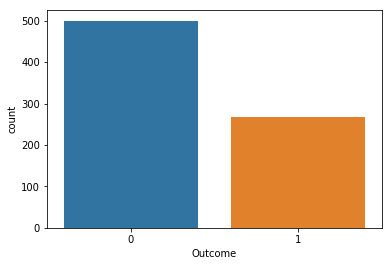

In [7]:
#View the distribution of output classes
sns.countplot(df['Outcome'],label="Count")

In [8]:
correlation_matrix = df.corr().round(2)

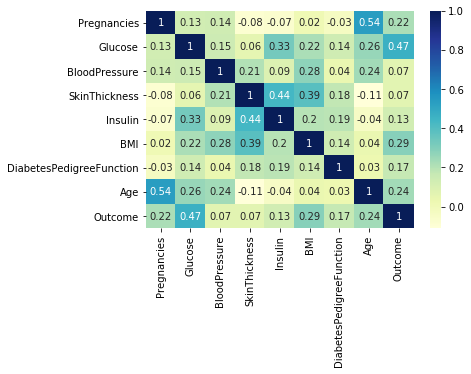

In [9]:
#View the correlation heatmap 
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu")

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


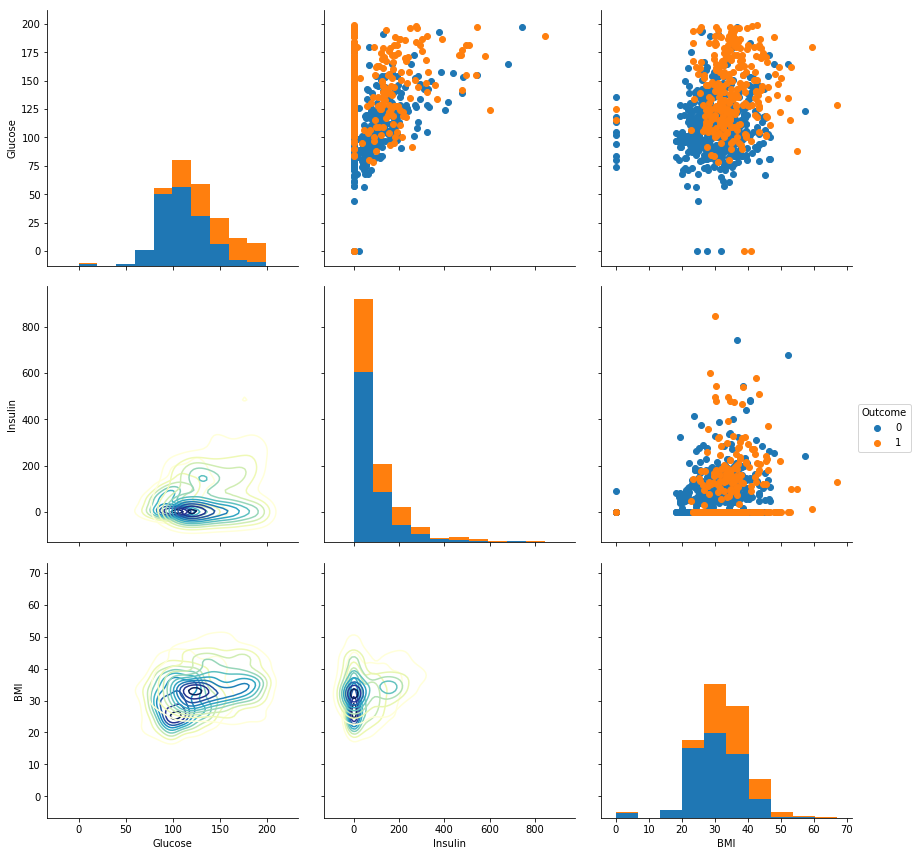

In [10]:
#View pairplots of 3 features vs target
g = sns.PairGrid(df, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="YlGnBu")
g.add_legend()

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


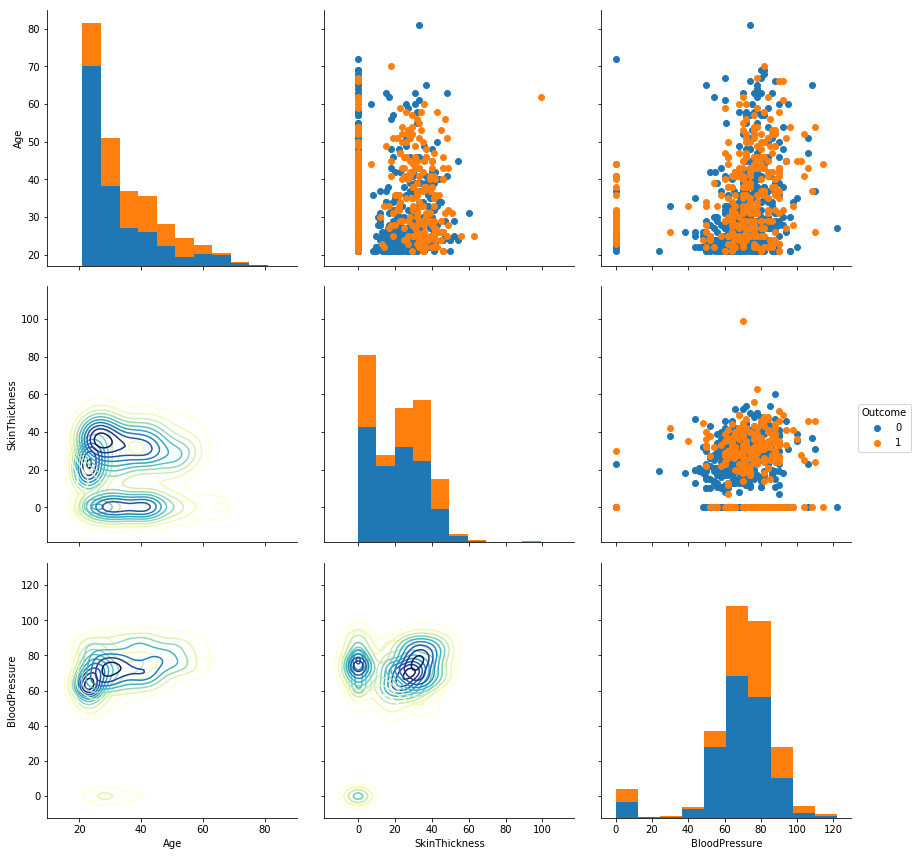

In [11]:
#Repeat as above for next 3 features
g = sns.PairGrid(df, vars=['Age', 'SkinThickness', 'BloodPressure'], hue="Outcome", size=4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="YlGnBu")
g.add_legend()
plt.show()

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


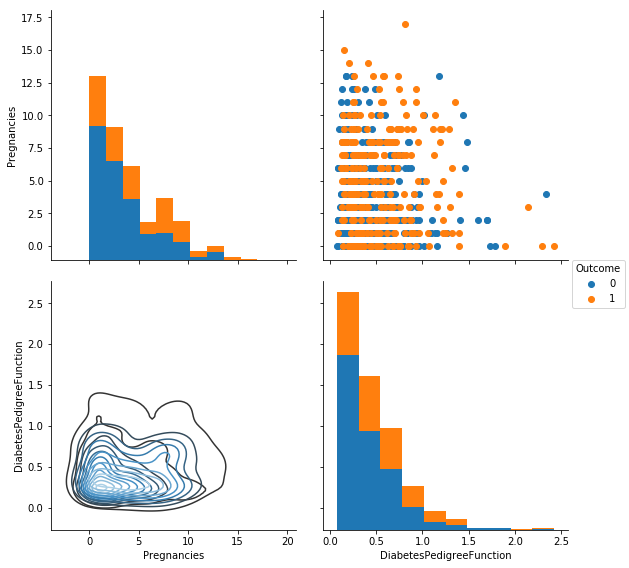

In [12]:
#Repeat for thr remaining features
g = sns.PairGrid(df, vars=['Pregnancies', 'DiabetesPedigreeFunction'], hue="Outcome", size=4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

In [13]:
#Remove the Outlier of skin thickness
outlier = df.SkinThickness.max()
df1 = df[df.SkinThickness!=outlier]

In [14]:
#Define an impute function to replace the '0's present in the columns Glucose, BloodPressure, SkinThickness, Insulin and BMI
def impute(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    df1.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    df1.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    impute(df1, c, 'Outcome')   #call the function here

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
#View the minumum values for the imputed features
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,121.598641,72.431749,29.113796,156.938543,32.443489,0.471742,33.203390,0.348110
std,3.371117,30.359689,12.113731,8.547994,88.900636,6.882979,0.331524,11.721879,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.000000,0.371000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.631285,206.846154,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#All features will be considered as input
X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [17]:
#The Outcome is the target 
y = df1[['Outcome']]

In [18]:
#Split the dataset using train-test split ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#View training set of features
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,70.877339,27.235457,130.287879,30.859674,0.304,21
554,1,84.0,64.000000,23.000000,115.000000,36.900000,0.471,28
346,1,139.0,46.000000,19.000000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,27.235457,130.287879,21.900000,0.254,65
231,6,134.0,80.000000,37.000000,370.000000,46.200000,0.238,46
340,1,130.0,70.000000,13.000000,105.000000,25.900000,0.472,22
534,1,77.0,56.000000,30.000000,56.000000,33.300000,1.251,24
306,10,161.0,68.000000,23.000000,132.000000,25.500000,0.326,47
718,1,108.0,60.000000,46.000000,178.000000,35.500000,0.415,24
90,1,80.0,55.000000,27.235457,130.287879,19.100000,0.258,21


In [20]:
#View training set of labels
y_train

,Outcome
60,0
554,0
346,0
294,0
231,1
340,0
534,0
306,1
718,0
90,0


In [21]:
#View testing set of features
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.0,58.000000,33.000000,190.000000,34.000000,0.430,43
324,2,112.0,75.000000,32.000000,130.287879,35.700000,0.148,21
624,2,108.0,64.000000,27.235457,130.287879,30.800000,0.158,21
690,8,107.0,80.000000,27.235457,130.287879,24.600000,0.856,34
521,3,124.0,80.000000,33.000000,130.000000,33.200000,0.305,26
204,6,103.0,72.000000,32.000000,190.000000,37.700000,0.324,55
97,1,71.0,48.000000,18.000000,76.000000,20.400000,0.323,22
336,0,117.0,70.877339,27.235457,130.287879,33.800000,0.932,44
567,6,92.0,62.000000,32.000000,126.000000,32.000000,0.085,46
148,5,147.0,78.000000,27.235457,130.287879,33.700000,0.218,65


In [22]:
#View testing set of labels
y_test

,Outcome
668,0
324,0
624,0
690,0
521,0
204,0
97,0
336,0
567,0
148,0


### Feature Scaling

In [23]:
#Scale the features to make sure that they are in the same range 
scaler = StandardScaler()
train_X = scaler.fit_transform(X_train)
test_X = scaler.transform(X_test)

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Classification using Logistic Regression

In [24]:
#Define the model and fit it to the training data
#Since it is a binary class classification let us try logistic regression

classifier = LogisticRegression(C=2.0, random_state=42, solver='sag', penalty='l2')
classifier.fit(train_X, y_train)

/Users/mrinmayi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

### Model Testing and Evaluation

In [25]:
#Evaluate the model on test data
y_pred = classifier.predict(test_X)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[94 10]
 [13 37]]


In [26]:
#Check Precision, Recall and F1-Score of both classes (0 and 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       104
           1       0.79      0.74      0.76        50

   micro avg       0.85      0.85      0.85       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



In [27]:
#Check accuracy
print('Training accuracy:', classifier.score(train_X, y_train))
print('Test accuracy:', classifier.score(test_X, y_test))

Training accuracy: 0.7814029363784666
Test accuracy: 0.8506493506493507


We can see that the F1 score for class 0 is higher than that for class 1. The classes are imbalanced but F1 score is pretty fair using Logistic Regression. Accuracy is not the correct measure to evaluate this model. I did  try other models such as SVM but logistic regression is performing better. I will upload new .ipynb files as soon as I improve the precision and recall for class 1. 

### Save the model 

In [28]:
#Save the model as a pickle object in Python
with open('log_classifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)

In [29]:
#Load the model
with open('log_classifier', 'rb') as training_model:  
    model = pickle.load(training_model)

In [33]:
#Verify that the model has been saved 
y_pred2 = model.predict(test_X)
print(classification_report(y_test, y_pred2))  

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       104
           1       0.79      0.74      0.76        50

   micro avg       0.85      0.85      0.85       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154

